In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib.colors import LinearSegmentedColormap


In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
main = pd.merge(athletes, regions, on='NOC', how='left')
main.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
main.set_index('ID', inplace=True)

In [7]:
main.isnull().sum()


Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [8]:
main.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [9]:
datatypes = main.dtypes
datatypes

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [10]:
medals = main[main['Medal'].notna()]
medal_counts = medals.groupby('region')['Medal'].count().reset_index()
medal_counts = medal_counts.sort_values(by='Medal', ascending=False)
medal_counts.columns=['Country', 'MedalCount']
medal_counts.reset_index(drop=True, inplace=True)
medal_counts.index += 1
medal_counts.head(10)

,Country,MedalCount
1,USA,5637
2,Russia,3947
3,Germany,3756
4,UK,2068
5,France,1777
6,Italy,1637
7,Sweden,1536
8,Canada,1352
9,Australia,1349
10,Hungary,1135


Pradėkime pasižiūrėdami kokios sporto šakos dominavo per visą Olimpinių žaidinių istoriją. Tam, suformuokime subsetą 'disciplines', susumuokime kiekvieną sport šaką ir nusibrėžkime stulpelinę diagramą. 

In [11]:
disciplines = main['Sport'].value_counts().reset_index()
disciplines.columns = ['Discipline', 'Athletes']
disciplines.index += 1

In [12]:
class BarPlot:
    def __init__(self, x=None, y=None, data=None):
        self.x = x
        self.y = y
        self.data = data
        self.figure = None
    
    def create_bar_plot(self, palette, title=None, figsize=(15,20)):
        self.figure = plt.figure(figsize=figsize)
        sns.set(style='darkgrid')
        sns.barplot(x=self.x, y=self.y, data=self.data, palette=palette)
        plt.xlabel(self.x)
        plt.ylabel(self.y)
        plt.title(title)
        return self.figure
    
    @staticmethod
    def annotate_bars(barplot, fontsize=10, color='black'):
        for bar in barplot.patches:
            barplot.annotate(f'{bar.get_width():.0f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                             ha='left', va='center', fontsize=fontsize, color=color)


In [13]:
class LinePlot:
    def __init__(self, x=None, y=None, data=None):
        self.x = x
        self.y = y
        self.data = data
        self.figure = None
    
    def create_line_plot(self, marker='o', color='green', title=None):
        self.figure = plt.figure(figsize=(10,5))
        sns.lineplot(data=self.data, x=self.x, y=self.y, marker=marker, color=color)
        plt.xlabel(self.x)
        plt.ylabel(self.y)
        plt.title(title)
        
        plt.grid(True, linestyle='--', alpha=0.7)
        return self.figure
    
    def configure_xticks(self, step, min_year, max_year):
        plt.xticks(range(min_year, max_year+1, step), rotation=90)

In [64]:
class Heatmap:
    def __init__(self, data=None, index=None, columns=None, figsize=(5, 5), cmap='summer', annot=True, fmt='d', linewidths=0.8, xlabel=None, ylabel=None, title=None, square=True):
        self.data = data
        self.index = index
        self.columns = columns
        self.figsize = figsize
        self.cmap = cmap
        self.annot = annot
        self.fmt = fmt
        self.linewidths = linewidths
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title
        self.square = square

    def create_heatmap(self):
        plt.figure(figsize=self.figsize)
        sns.heatmap(self.data, cmap=self.cmap, annot=self.annot, fmt=self.fmt, linewidths=self.linewidths, square=self.square)
        
        if self.xlabel:
            plt.xlabel(self.xlabel)
        if self.ylabel:
            plt.ylabel(self.ylabel)
        if self.title:
            plt.title(self.title)


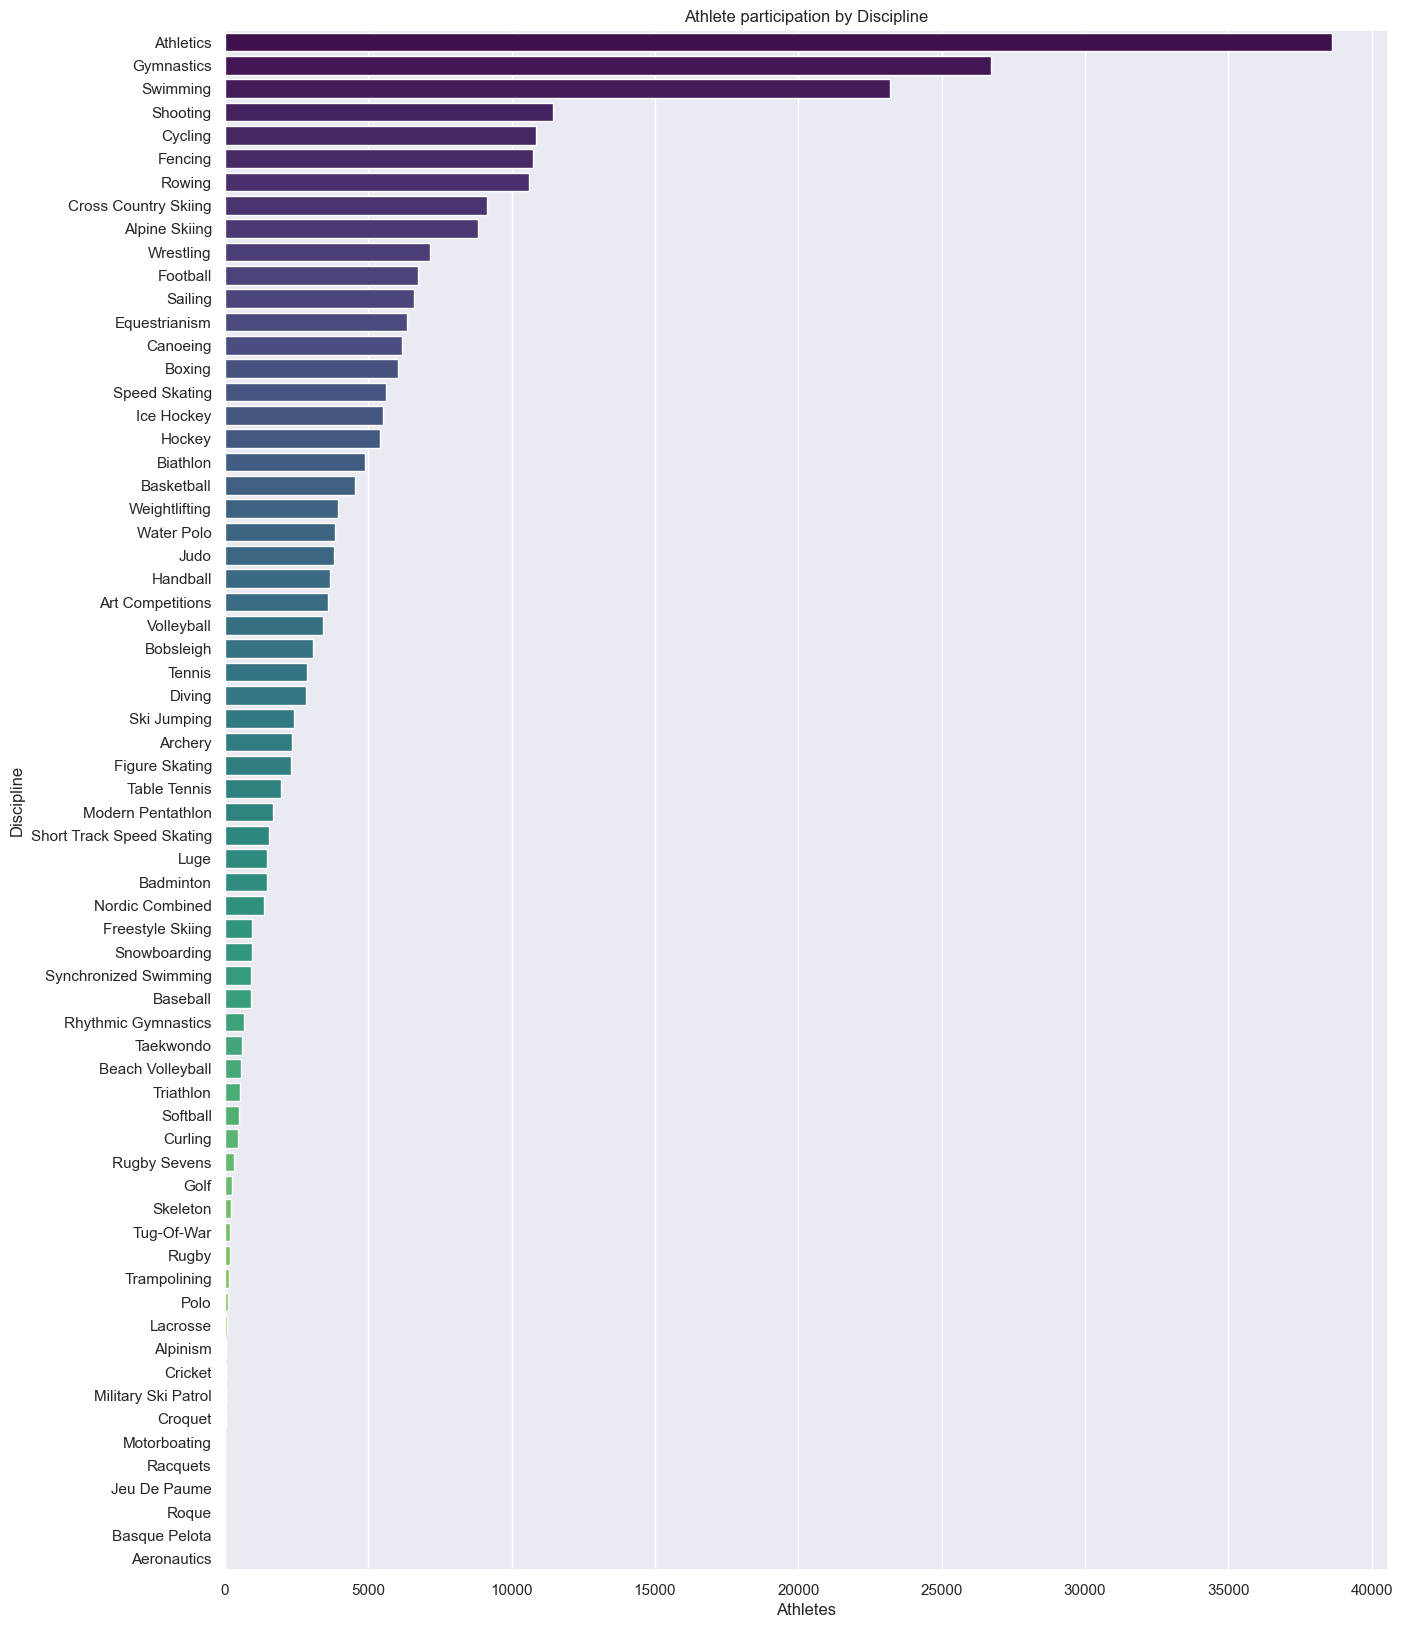

In [15]:
bar_plot_main = BarPlot(x='Athletes', y='Discipline', data=disciplines)
bar_graph = bar_plot_main.create_bar_plot(palette='viridis', title='Athlete participation by Discipline')
bar_plot_main.annotate_bars(bar_graph)

In [16]:
summer_df = main[(main['Season'] == 'Summer')]
winter_df = main[(main['Season'] == 'Winter')]


In [17]:
disciplines_summer = summer_df.groupby('Sport')['Season'].count().reset_index()
disciplines_summer = disciplines_summer.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_summer.columns=['Discipline', 'Occurences']
disciplines_summer.index +=1
disciplines_summer.tail()

,Discipline,Occurences
48,Jeu De Paume,11
49,Roque,4
50,Alpinism,4
51,Basque Pelota,2
52,Aeronautics,1


KLAUSIMAS 1

In [18]:
lowest_participation_summer_grouped = summer_df.groupby('Sport')['Name'].nunique().reset_index()
lowest_participation_summer_filtered = lowest_participation_summer_grouped[lowest_participation_summer_grouped['Name'] < 10]
lowest_participation_summer_filtered

lowest_participation_summer_final = summer_df[summer_df['Sport'].isin(lowest_participation_summer_filtered['Sport'])].sort_values('Year', ascending=True)



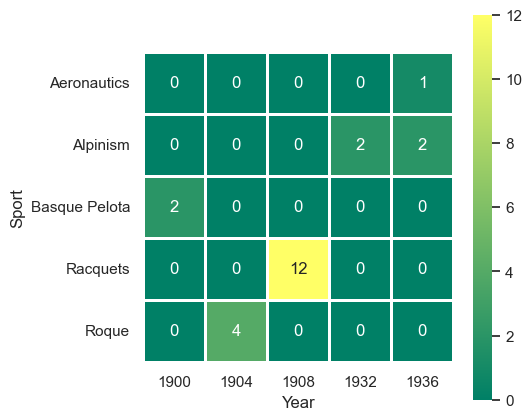

In [71]:
pivot_table = lowest_participation_summer_final.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year')
heatmap_creator.create_heatmap()

In [20]:
# raquets = main[(main['Sport']=='Racquets') & (main['Season']=='Summer')]
# raquets

In [21]:
disciplines_winter = winter_df.groupby('Sport')['Season'].count().reset_index()
disciplines_winter = disciplines_winter.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_winter.columns=['Discipline', 'Occurences']
disciplines_winter.index +=1
disciplines_winter

,Discipline,Occurences
1,Cross Country Skiing,9133
2,Alpine Skiing,8829
3,Speed Skating,5613
4,Ice Hockey,5456
5,Biathlon,4893
6,Bobsleigh,3058
7,Ski Jumping,2401
8,Figure Skating,2244
9,Short Track Speed Skating,1534
10,Luge,1479


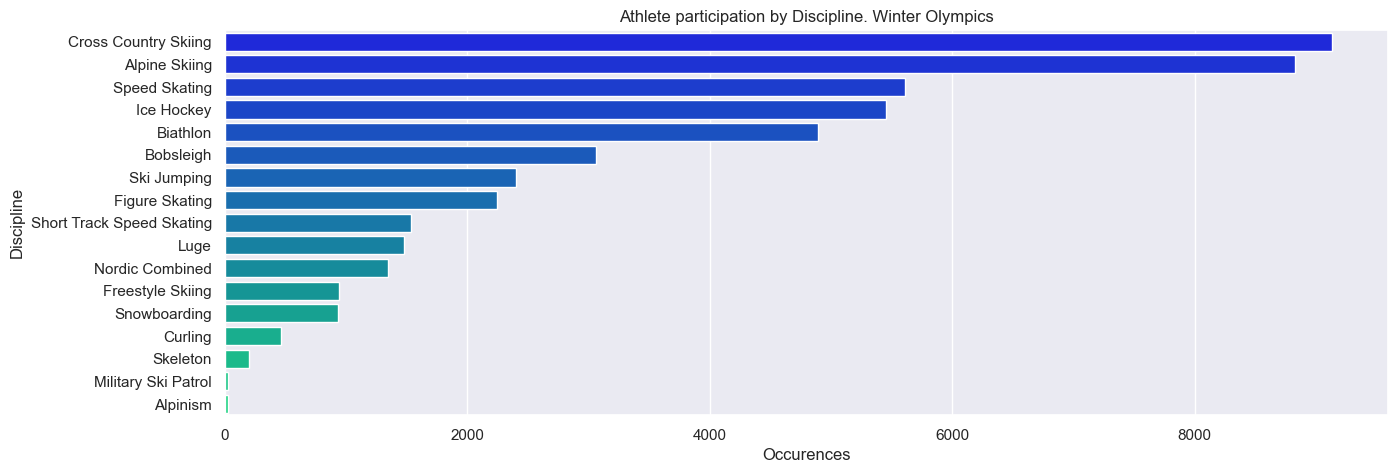

In [22]:
bar_plot_winter = BarPlot(x='Occurences', y='Discipline', data=disciplines_winter)

bar_graph_winter = bar_plot_winter.create_bar_plot(palette='winter', figsize=(15,5), title='Athlete participation by Discipline. Winter Olympics')
bar_plot_winter.annotate_bars(bar_graph_winter)

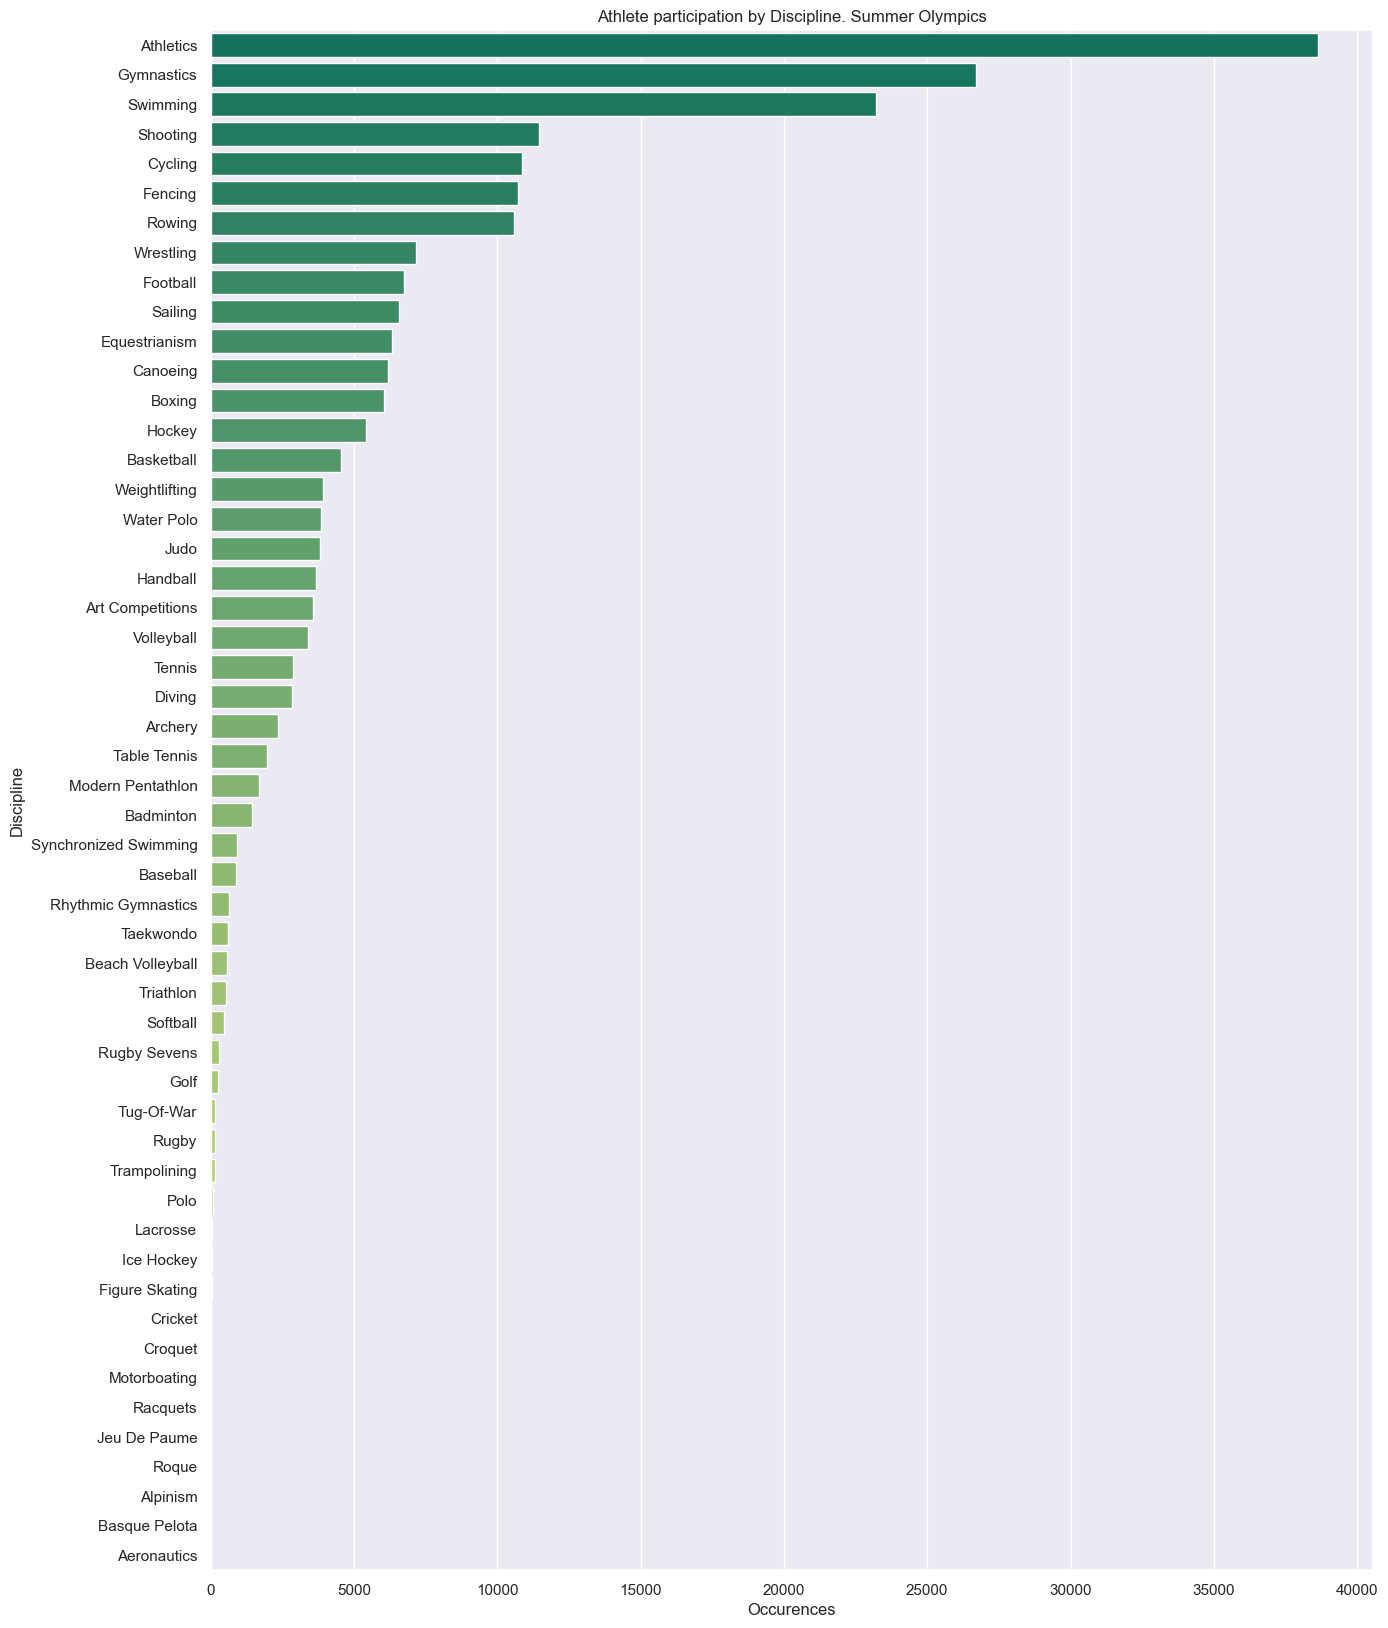

In [23]:
bar_plot_summer = BarPlot(x='Occurences', y='Discipline', data=disciplines_summer)
bar_graph_summer = bar_plot_summer.create_bar_plot(palette='summer', title='Athlete participation by Discipline. Summer Olympics')
bar_plot_summer.annotate_bars(bar_graph_summer)

In [24]:
sport_counts_by_year_summer = summer_df.groupby('Year')['Sport'].nunique().reset_index()


In [25]:
summer_df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


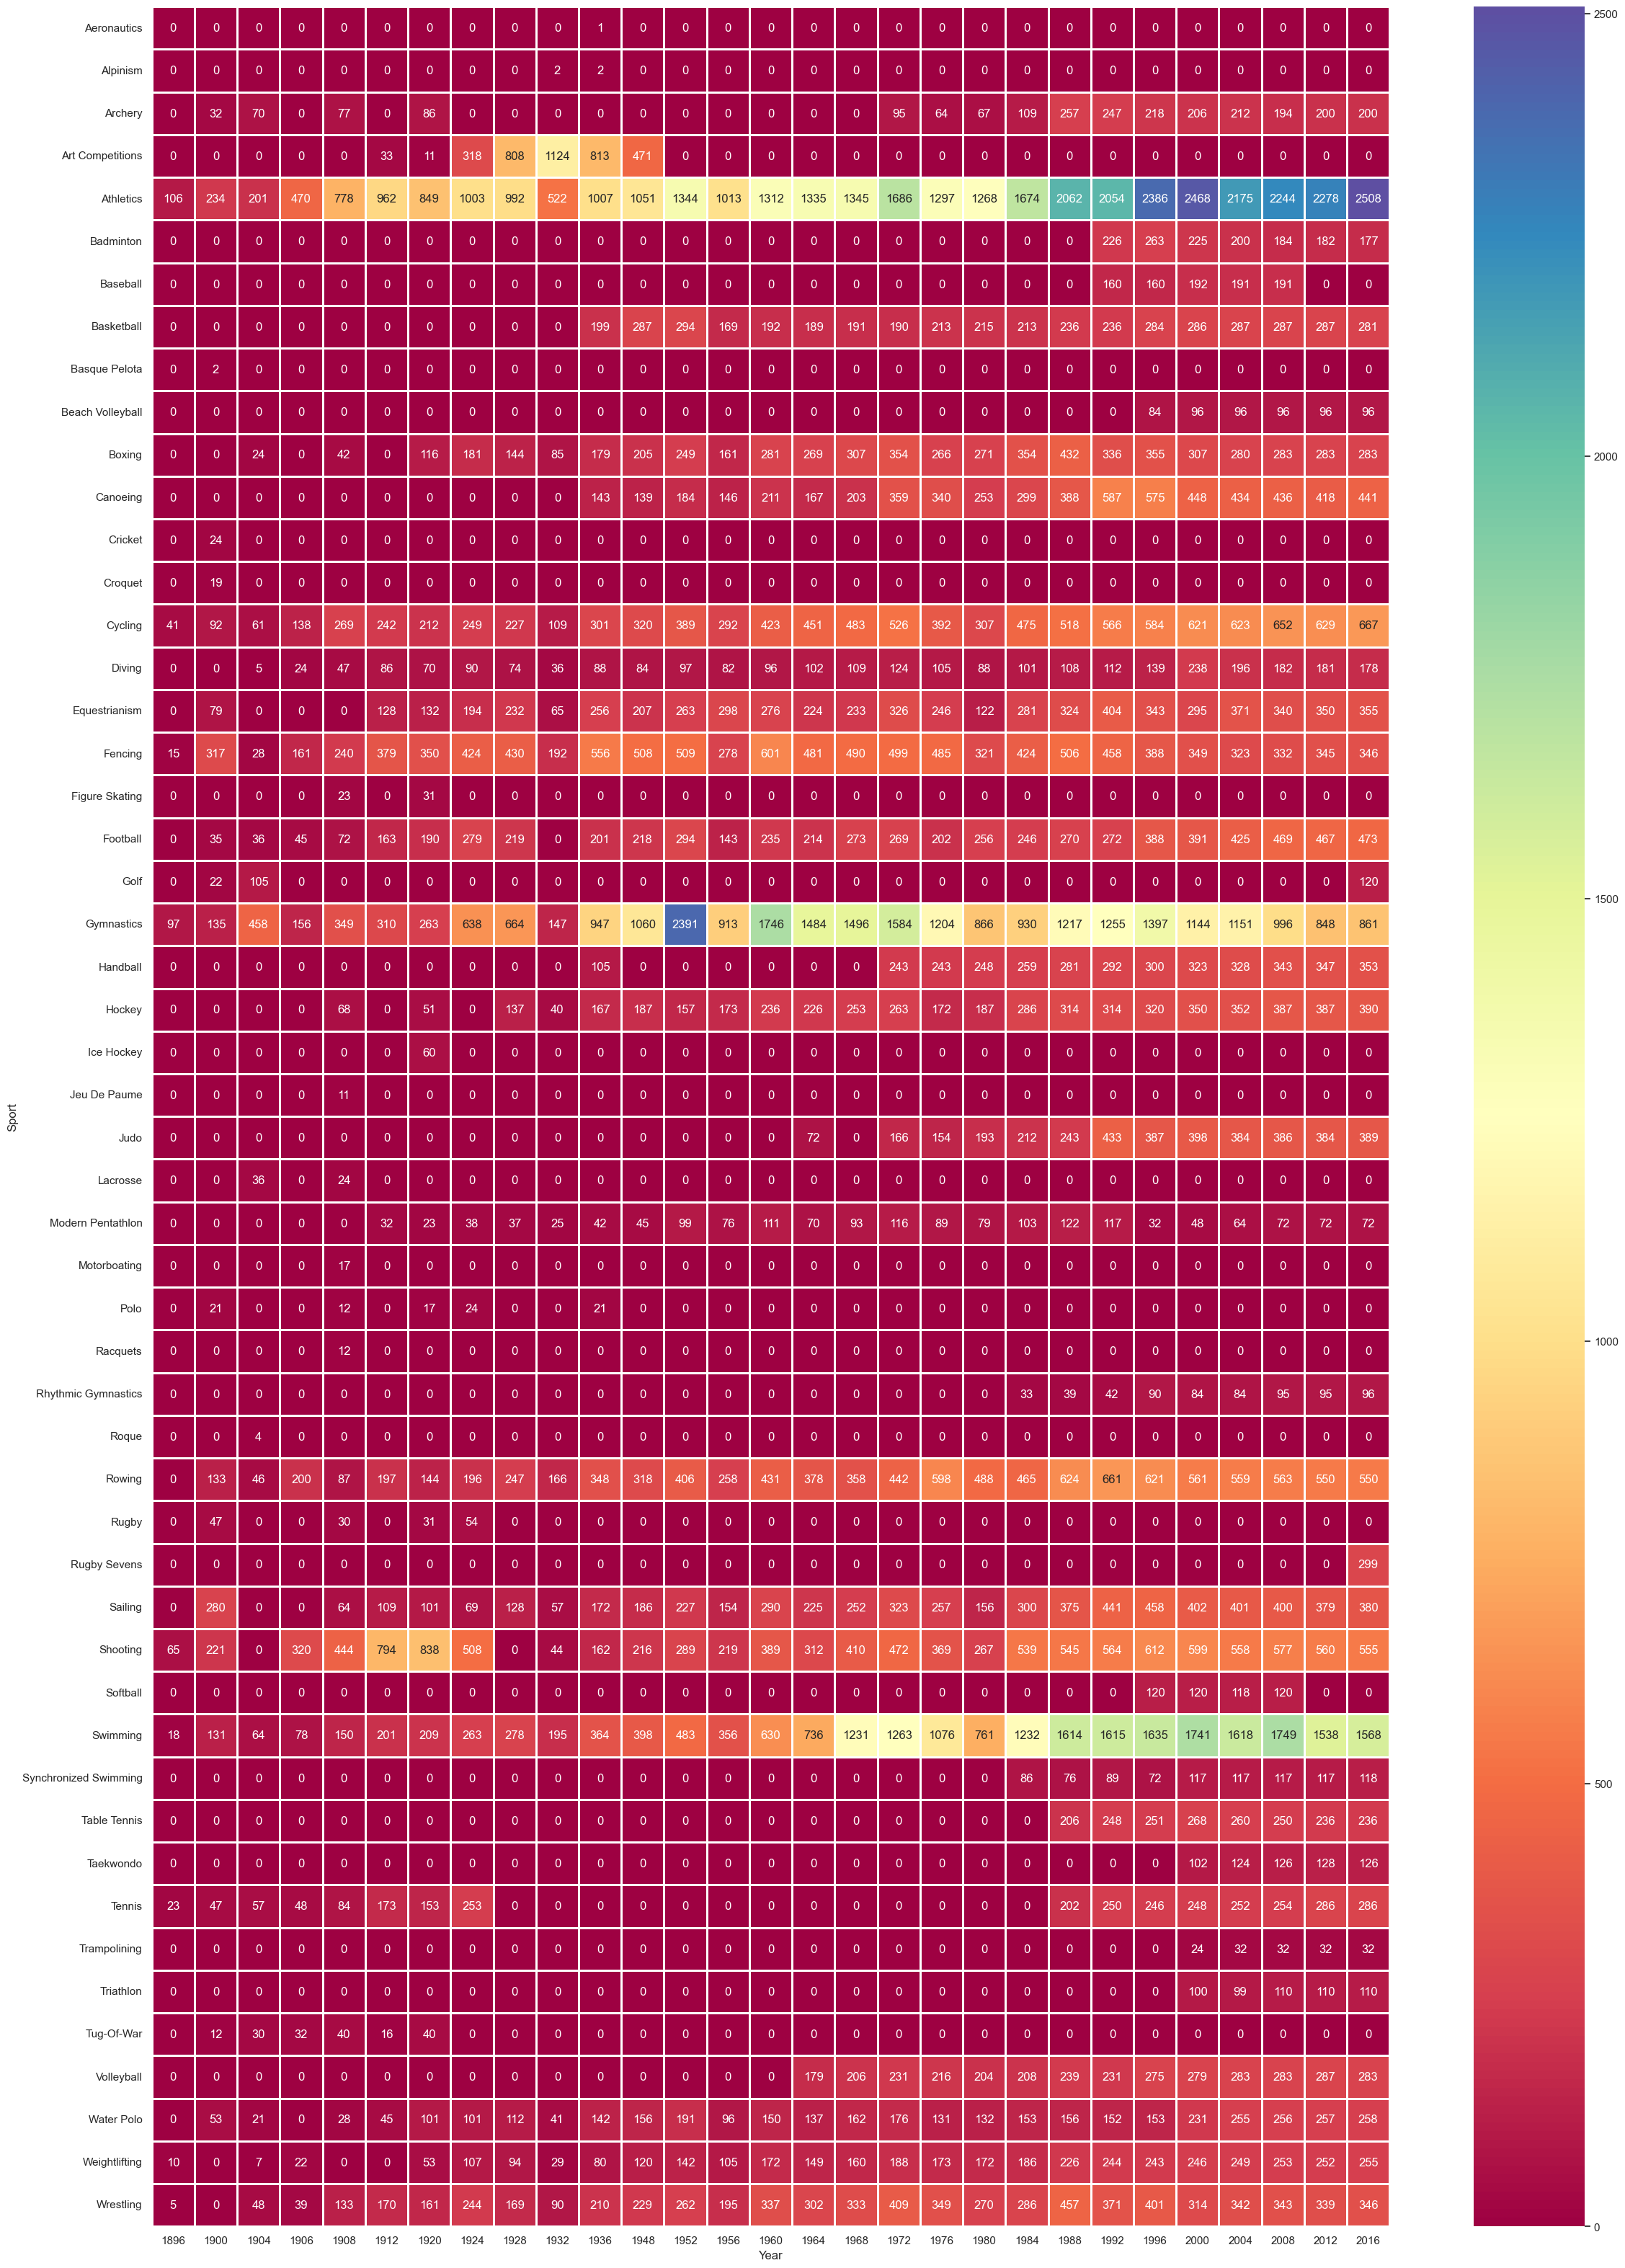

In [65]:
pivot_table = summer_df.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(30,40), cmap='Spectral')
heatmap_creator.create_heatmap()

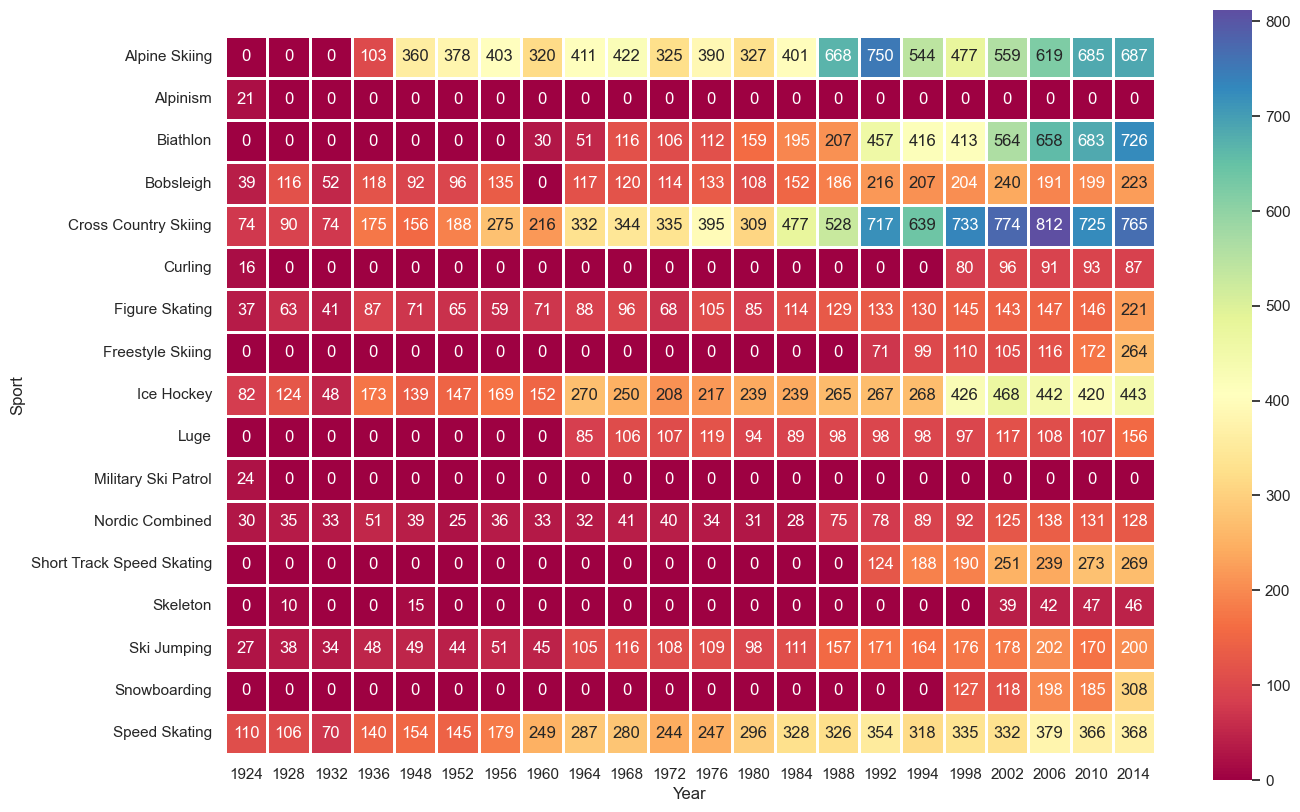

In [67]:
pivot_table = winter_df.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)
heatmap_creator = Heatmap(data=pivot_table, index='Sport', columns='Year', figsize=(15,10), cmap='Spectral')
heatmap_creator.create_heatmap()

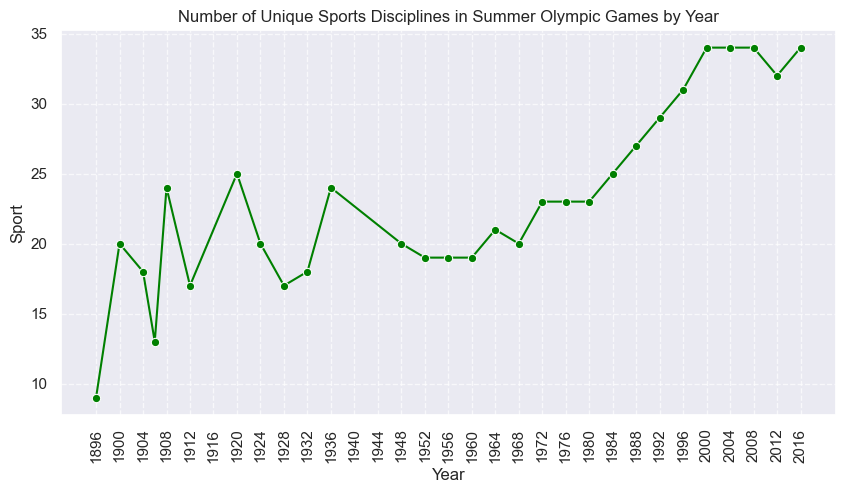

In [28]:
line_plot_main = LinePlot(data=sport_counts_by_year_summer, x='Year', y='Sport')
line_plot_main.create_line_plot(title='Number of Unique Sports Disciplines in Summer Olympic Games by Year')
line_plot_main.configure_xticks(step=4, min_year=1896, max_year=2016)

In [29]:
winter_df = main[main['Season'] == 'Winter']
sport_counts_by_year_winter = winter_df.groupby('Year')['Sport'].nunique().reset_index()

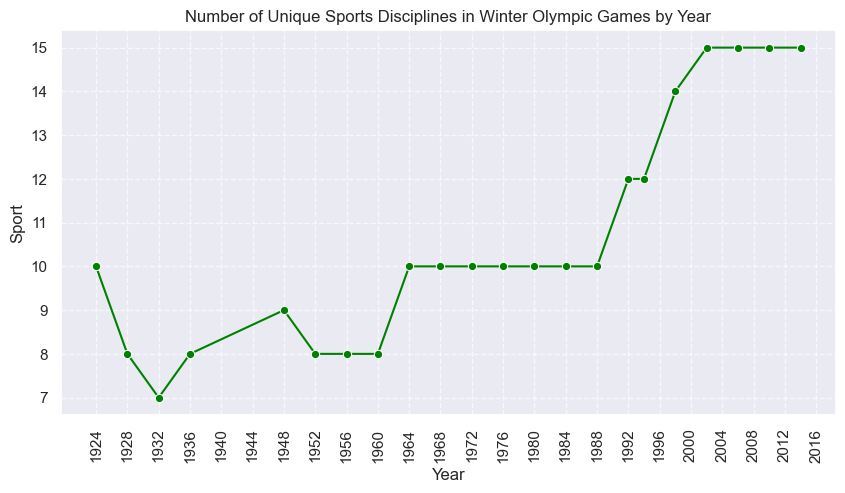

In [30]:
line_plot_main = LinePlot(data=sport_counts_by_year_winter, x='Year', y='Sport')
line_plot_main.create_line_plot(title='Number of Unique Sports Disciplines in Winter Olympic Games by Year')
line_plot_main.configure_xticks(step=4, min_year=1924, max_year=2016)

In [31]:
winter_df_earlier = winter_df[winter_df['Year']< 1988]
max_winter_df_earlier = winter_df_earlier['Year'].max()
max_winter_df_earlier

1984

In [32]:
winter_df_later = winter_df[winter_df['Year']>= 1988]
min_winter_df_late = winter_df_later['Year'].min()
min_winter_df_late

1988

In [33]:
winter_df_later1 = winter_df_later['Sport'].unique().tolist()
winter_df_later1

['Speed Skating',
 'Cross Country Skiing',
 'Ice Hockey',
 'Biathlon',
 'Alpine Skiing',
 'Bobsleigh',
 'Figure Skating',
 'Nordic Combined',
 'Freestyle Skiing',
 'Luge',
 'Curling',
 'Snowboarding',
 'Ski Jumping',
 'Short Track Speed Skating',
 'Skeleton']

In [34]:
winter_df_earlier1 = winter_df_earlier['Sport'].unique().tolist()
winter_df_earlier1

['Cross Country Skiing',
 'Speed Skating',
 'Luge',
 'Figure Skating',
 'Bobsleigh',
 'Ice Hockey',
 'Nordic Combined',
 'Biathlon',
 'Alpine Skiing',
 'Ski Jumping',
 'Curling',
 'Military Ski Patrol',
 'Skeleton',
 'Alpinism']

In [35]:
new_sport_winter = []
for sport in winter_df_later1:
    if sport not in winter_df_earlier1:
        new_sport_winter.append(sport)
print(new_sport_winter)

['Freestyle Skiing', 'Snowboarding', 'Short Track Speed Skating']


In [36]:
summer_df_earlier = summer_df[summer_df['Year']< 1980]
max_summer_df_earlier = summer_df_earlier['Year'].max()
max_summer_df_earlier

summer_df_later = summer_df[summer_df['Year']>= 1980]
min_summer_df_later = summer_df_later['Year'].min()
min_summer_df_later

summer_df_later1 = summer_df_later['Sport'].unique().tolist()
summer_df_earlier1 = summer_df_earlier['Sport'].unique().tolist()

In [37]:
new_sport_summer = []
for sport in summer_df_later1:
	if sport not in summer_df_earlier1:
		new_sport_summer.append(sport)
print(new_sport_summer)

['Badminton', 'Taekwondo', 'Softball', 'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon']


In [38]:
summer_sports = summer_df['Sport']
winter_sports = winter_df['Sport']

summer_sports_set = set(summer_df['Sport'])
winter_sports_set = set(winter_df['Sport'])

In [39]:
sport_in_both_games = set(summer_sports).intersection(winter_sports)
sport_in_both_games_list = list(sport_in_both_games)

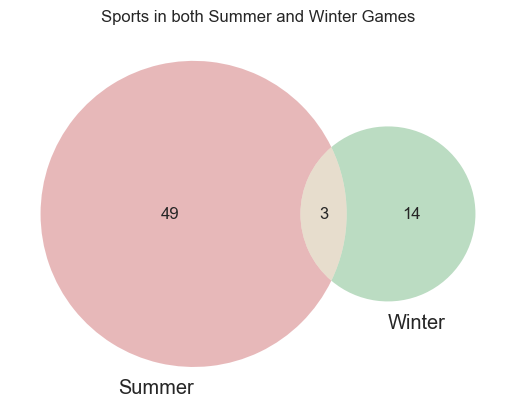

Sports in both games: Ice Hockey. Alpinism. Figure Skating. 


In [40]:
set1 = summer_sports_set
set2 = winter_sports_set

# Create a Venn diagram
venn2([set1, set2], set_labels=('Summer', 'Winter'))

# Show the plot
plt.title('Sports in both Summer and Winter Games')
plt.show()
print('Sports in both games:', end=' ')
for sports in sport_in_both_games_list:
    print(sports, end='. ')
print()

In [41]:
winter_in_summer = summer_df[summer_df['Sport'].isin(sport_in_both_games)]
min_value = winter_in_summer['Year'].min()
max_value = winter_in_summer['Year'].max()
print(min_value, max_value)

1908 1936


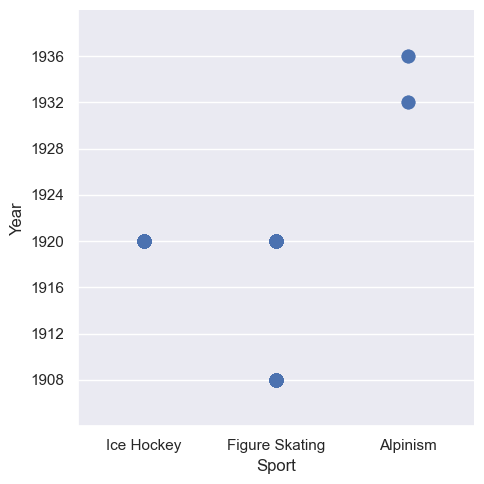

In [42]:
catplot = sns.catplot(data=winter_in_summer, y='Year', x='Sport', jitter=False, size=10, )
catplot.set(ylim=(1904, 1940))
catplot.set(yticks=range(min_value, max_value+1, 4))

2 dalis. Medalių pasiskirstymas

In [43]:
goldMedals = main[(main.Medal == 'Gold')]



Text(0.5, 1.0, 'Aukso medalių pasiskirstymas amžių grupėje')

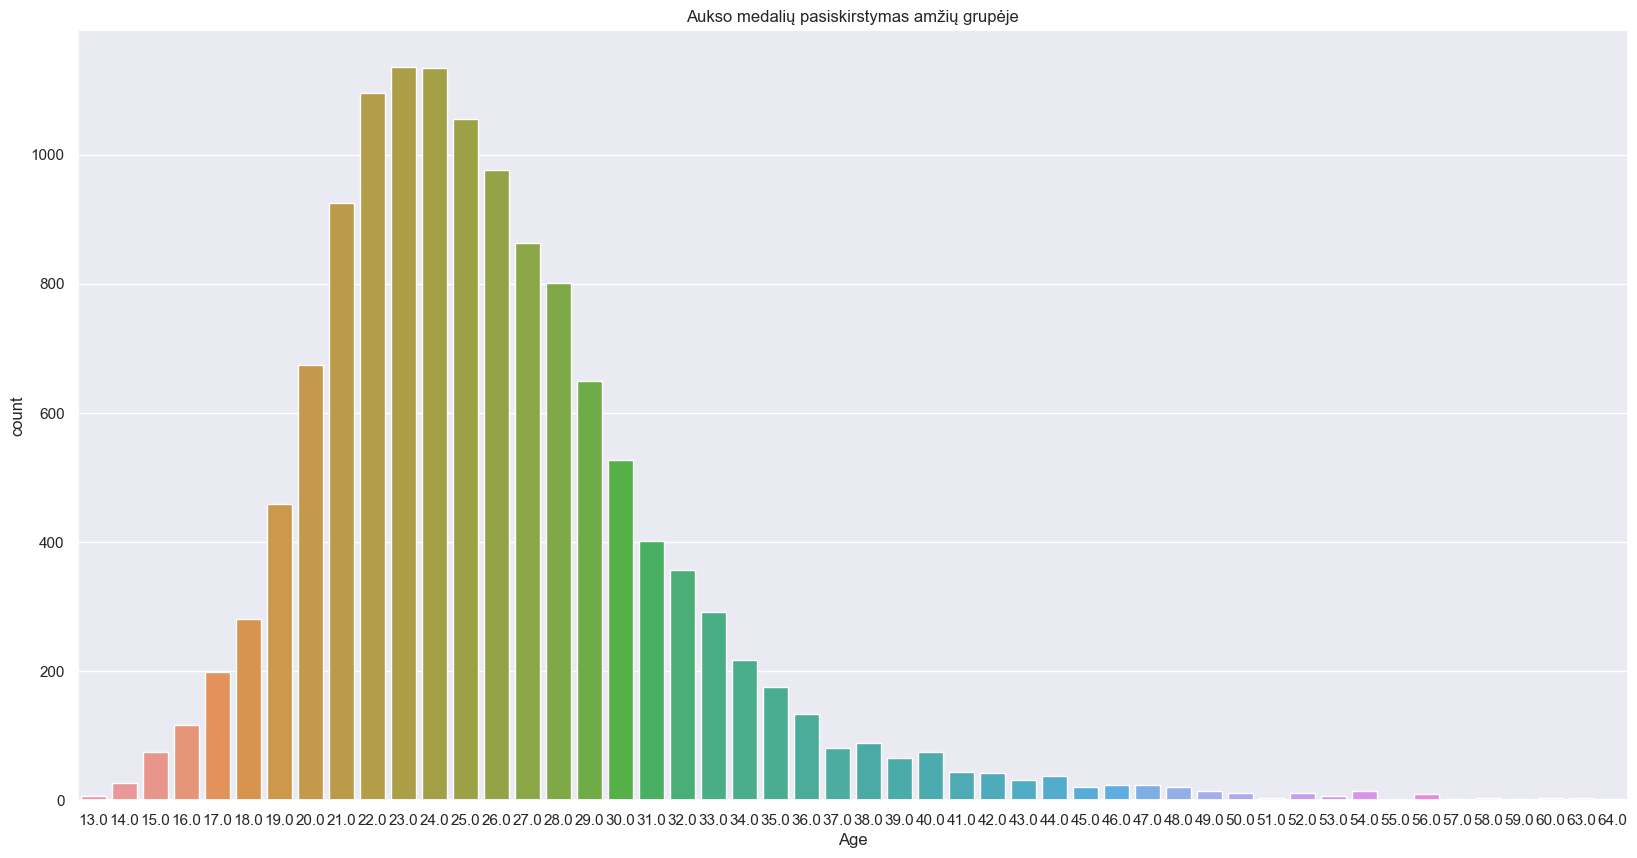

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(data=goldMedals, x='Age')
plt.title('Aukso medalių pasiskirstymas amžių grupėje')



In [45]:
goldMedals_greater40 = main[(main.Medal == 'Gold')]

In [46]:
number_of_games = main['Year'].nunique()
number_of_games
number_of_games_summer = main[(main['Season'] == 'Summer')]
number_of_games_summer = number_of_games_summer['Year'].nunique()
print(f'Total Summer Games {number_of_games_summer}')
number_of_games_winter = main[(main['Season'] == 'Winter')]
number_of_games_winter = number_of_games_winter['Year'].nunique()
print(f'Total Winter Games {number_of_games_winter}')

Total Summer Games 29
Total Winter Games 22
